<a href="https://colab.research.google.com/github/sagar0135/Attender-Feedback-System/blob/main/Dissertation_GCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **An Integrated Approach to Detecting and Mitigating Internal Misuse.**

In [92]:
# @title
# Importing required libraries
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [93]:
# Loading the dataset
#url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
#columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
 #          "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
  #        "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
   #        "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    #       "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
     #      "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

In [94]:
# Reading the dataset
data = pd.read_csv('/content/drive/MyDrive/Dissertation /Insider threat.csv')

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# Printing the information of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3758 entries, 0 to 3757
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Flow ID                       3758 non-null   object 
 1    Source IP                    3758 non-null   object 
 2    Source Port                  3758 non-null   int64  
 3    Destination IP               3758 non-null   object 
 4    Destination Port             3758 non-null   int64  
 5    Protocol                     3758 non-null   int64  
 6    Timestamp                    3758 non-null   object 
 7    Flow Duration                3758 non-null   int64  
 8    Total Fwd Packets            3758 non-null   int64  
 9    Total Backward Packets       3758 non-null   int64  
 10  Total Length of Fwd Packets   3758 non-null   int64  
 11   Total Length of Bwd Packets  3758 non-null   int64  
 12   Fwd Packet Length Max        3758 non-null   int64  
 13   Fw

In [97]:
# Checking the first few rows of the dataset
print(data.head())

                                  Flow ID       Source IP   Source Port  \
0  172.217.12.142-10.42.0.211-443-41367-6     10.42.0.211         41367   
1  172.217.12.142-10.42.0.211-443-41367-6  172.217.12.142           443   
2    10.42.0.211-42.62.4.133-54523-9999-6     10.42.0.211         54523   
3   172.217.9.234-10.42.0.211-443-36480-6     10.42.0.211         36480   
4    172.217.7.10-10.42.0.211-443-58073-6     10.42.0.211         58073   

   Destination IP   Destination Port   Protocol         Timestamp  \
0  172.217.12.142                443          6  14/06/2017 05:16   
1     10.42.0.211              41367          6  14/06/2017 05:16   
2     42.62.4.133               9999          6  14/06/2017 05:16   
3   172.217.9.234                443          6  14/06/2017 05:16   
4    172.217.7.10                443          6  14/06/2017 05:16   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0              55                   2                        0 

In [98]:
# Printing the Data Shape
print("Data Shape:", data.shape)

Data Shape: (3758, 85)


In [99]:
# Printing Basic statistics of numerical features
print(data.describe())

        Source Port   Destination Port     Protocol   Flow Duration  \
count   3758.000000        3758.000000  3758.000000    3.758000e+03   
mean   40295.073443        5030.149282     7.799095    1.068898e+07   
std    16882.832753       14107.537413     4.132015    2.069244e+07   
min        0.000000           0.000000     0.000000    2.000000e+00   
25%    35524.250000          80.000000     6.000000    1.149298e+05   
50%    43341.000000          80.000000     6.000000    1.524043e+06   
75%    51774.000000         443.000000     6.000000    1.214282e+07   
max    65320.000000       60870.000000    17.000000    1.199544e+08   

        Total Fwd Packets   Total Backward Packets  \
count         3758.000000              3758.000000   
mean             5.872805                 8.127994   
std             36.395343                95.004657   
min              1.000000                 0.000000   
25%              1.000000                 0.000000   
50%              2.000000           

In [100]:
# Checking for missing values
print(data.isnull().sum())

Flow ID              0
 Source IP           0
 Source Port         0
 Destination IP      0
 Destination Port    0
                    ..
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle_Min            0
 Label               0
Length: 85, dtype: int64


In [101]:
# Normalize column names
data.columns = data.columns.str.strip().str.lower()

In [102]:
# Exploring the distribution of the label column
print("Label Value Counts:")
print(data.columns)
print(data['label'].value_counts())


Label Value Counts:
Index(['flow id', 'source ip', 'source port', 'destination ip',
       'destination port', 'protocol', 'timestamp', 'flow duration',
       'total fwd packets', 'total backward packets',
       'total length of fwd packets', 'total length of bwd packets',
       'fwd packet length max', 'fwd packet length min',
       'fwd packet length mean', 'fwd packet length std',
       'bwd packet length max', 'bwd packet length min',
       'bwd packet length mean', 'bwd packet length std', 'flow bytes/s',
       'flow packets/s', 'flow iat mean', 'flow iat std', 'flow iat max',
       'flow iat min', 'fwd iat total', 'fwd iat mean', 'fwd iat std',
       'fwd iat max', 'fwd iat min', 'bwd iat total', 'bwd iat mean',
       'bwd iat std', 'bwd iat max', 'bwd iat min', 'fwd psh flags',
       'bwd psh flags', 'fwd urg flags', 'bwd urg flags', 'fwd header length',
       'bwd header length', 'fwd packets/s', 'bwd packets/s',
       'min packet length', 'max packet length', 'pac

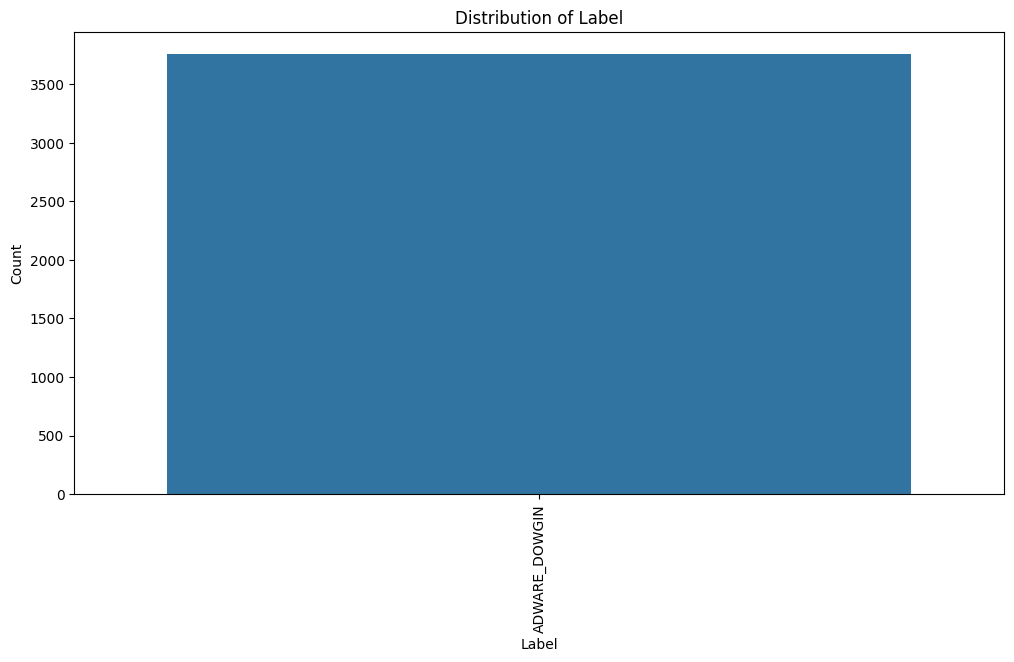

In [103]:
# Visualizing the distribution of the label column
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

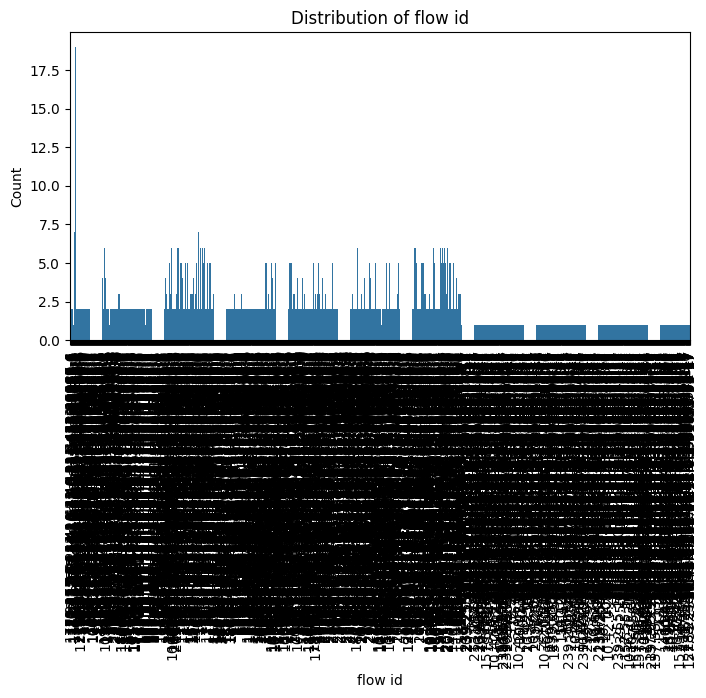

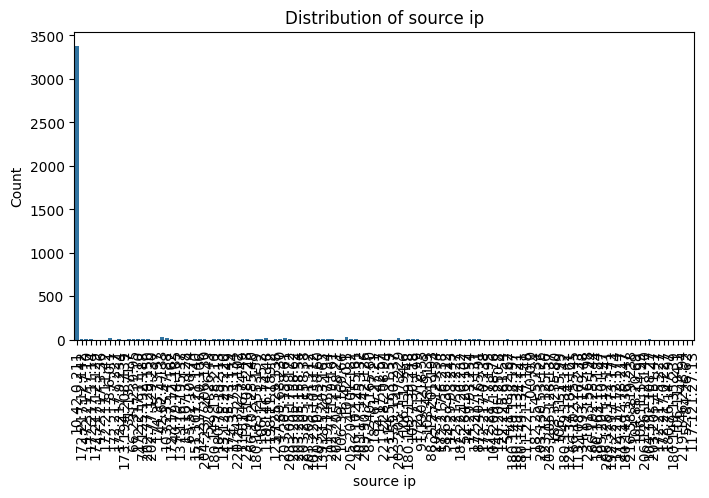

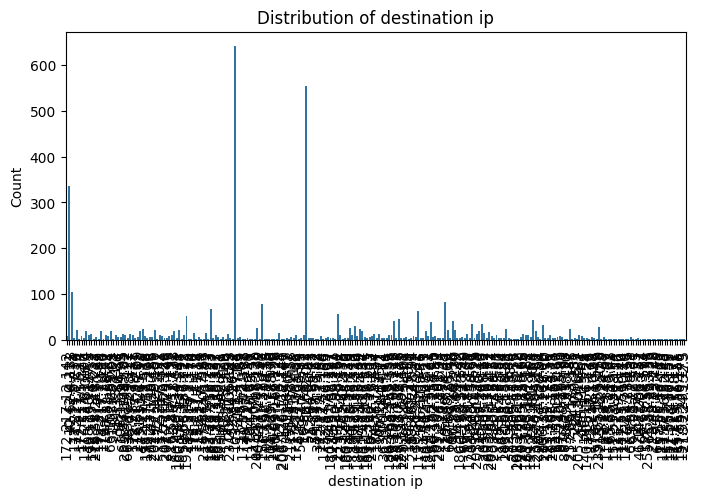

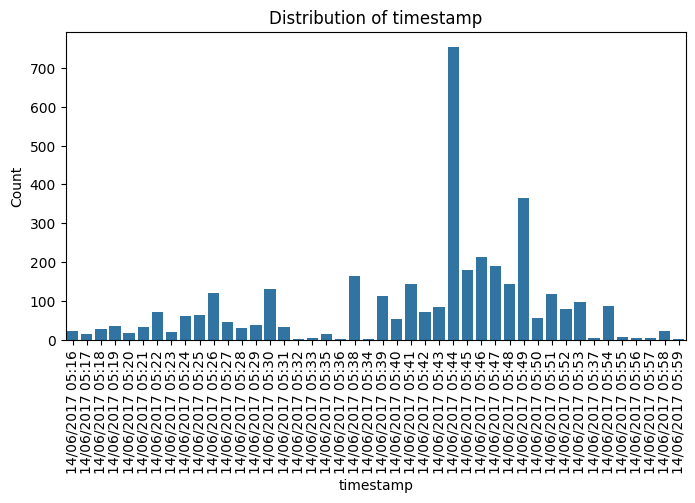

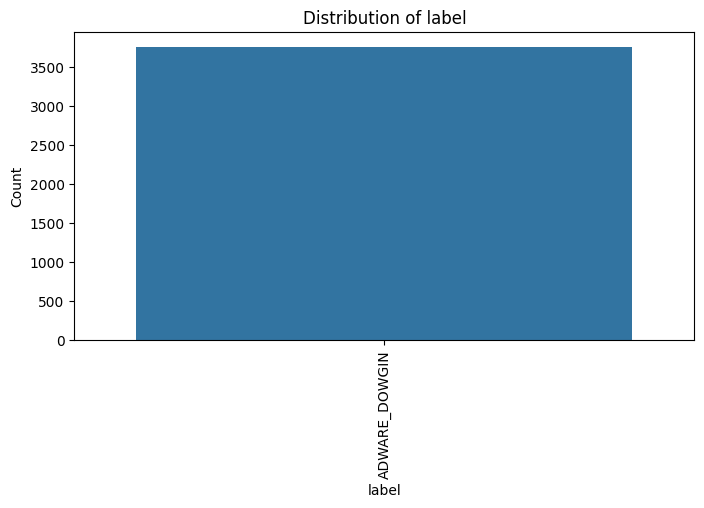

In [104]:
# Exploring the distribution of categorical features
CategoricalFeatures = data.select_dtypes(include=['object'])
for column in CategoricalFeatures.columns:
  plt.figure(figsize=(8, 4))
  sns.countplot(x=column, data=data)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()

## User Activity Analysis

In [105]:
data.columns = data.columns.str.strip().str.lower()


In [106]:
# Calculating total connections initiated by each source IP address.
UserActivity = data.groupby('label')['timestamp'].count().reset_index()
print(UserActivity)



           label  timestamp
0  ADWARE_DOWGIN       3758


## Service Activity Analysis

In [107]:
ServiceActivity = data.groupby('protocol')['label'].count().reset_index()
print(ServiceActivity)


   protocol  label
0         0     19
1         6   3114
2        17    625


In [108]:
# Normalize column names
data.columns = data.columns.str.strip().str.lower()

In [109]:
# Analysing the distribution of connections to different services.
ServiceActivity = data.groupby('destination ip')['label'].count().reset_index()
print(ServiceActivity)


      destination ip  label
0          10.42.0.1    554
1        10.42.0.211    336
2        10.42.0.255      2
3    101.226.103.112      1
4      103.235.47.88    641
..               ...    ...
249          8.0.6.4     19
250    87.240.165.80      5
251    87.240.165.91      8
252   88.212.201.193      1
253    91.190.218.55      1

[254 rows x 2 columns]


## Network Traffic Analysis

In [110]:
# Analyzing the distribution of network traffic by protocol type.
ProtocolTraffic = data.groupby('protocol')['label'].count().reset_index()
print(ProtocolTraffic)

   protocol  label
0         0     19
1         6   3114
2        17    625


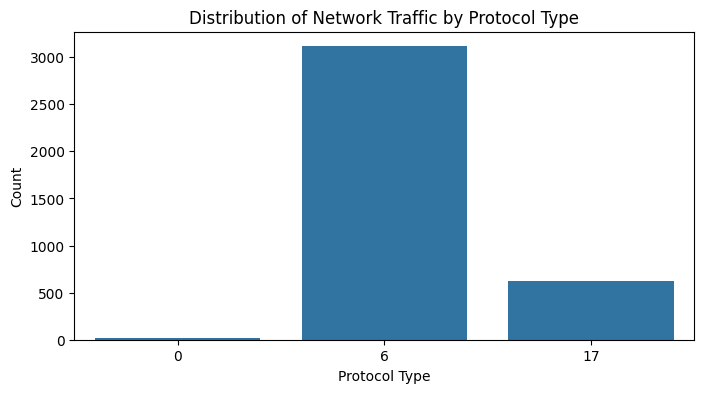

In [111]:
# Plotting the distribution of network traffic by protocol type.
plt.figure(figsize=(8, 4))
sns.barplot(x='protocol', y='label', data=ProtocolTraffic)
plt.title('Distribution of Network Traffic by Protocol Type')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.show()

## Correlations Matrix

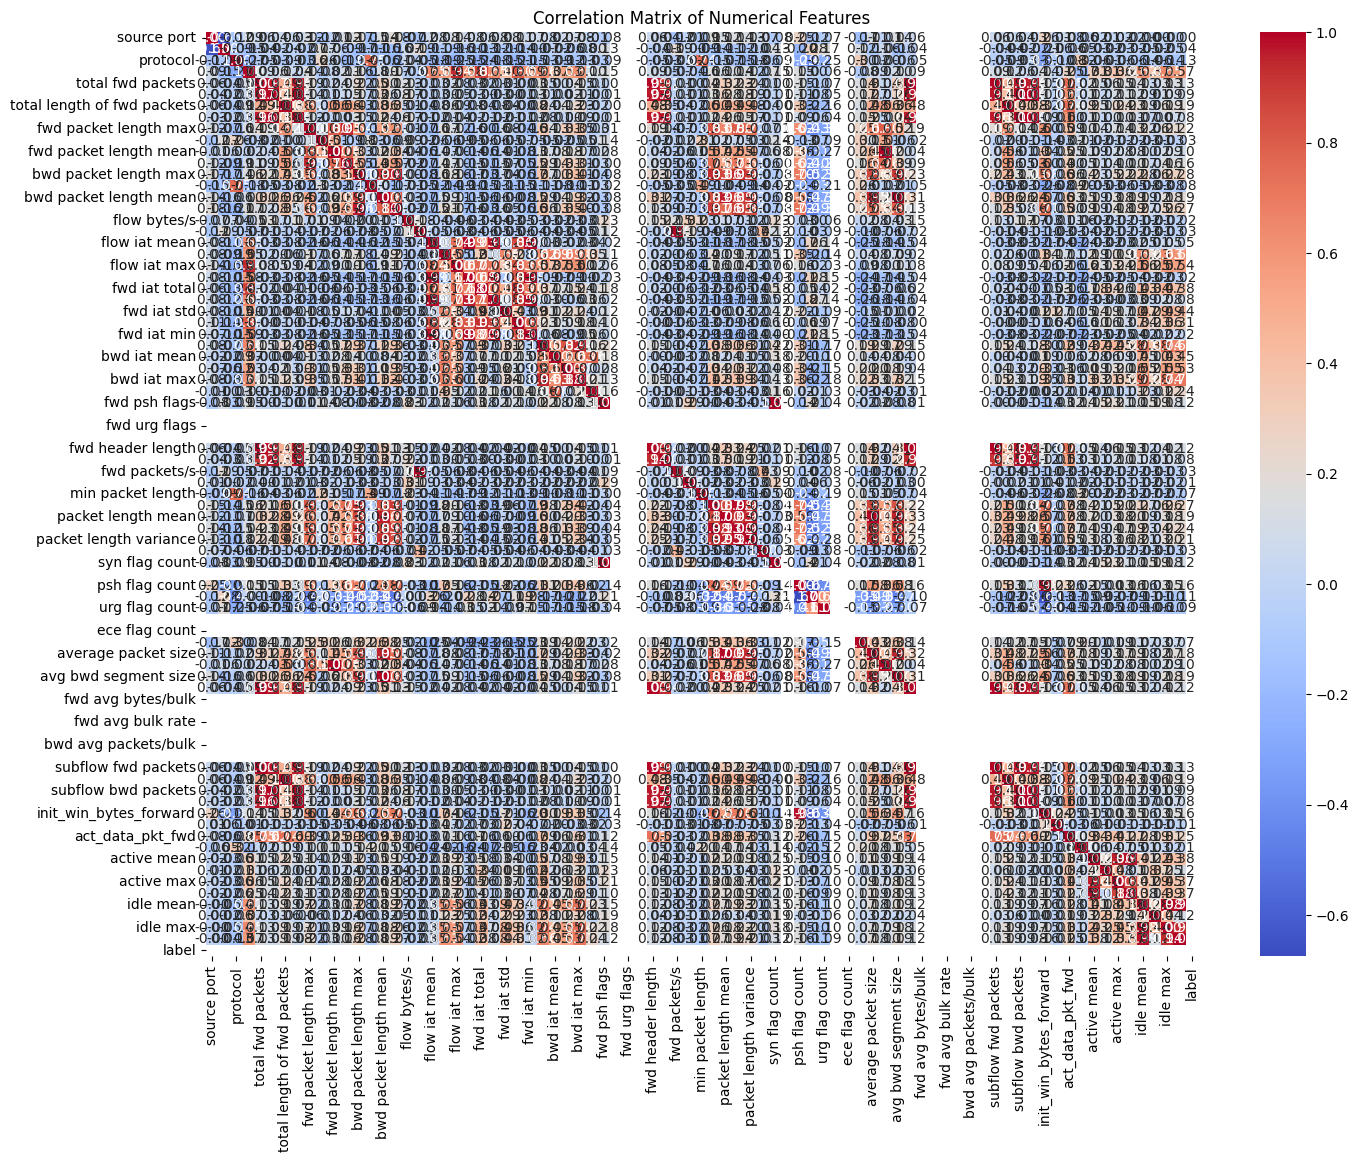

In [127]:
# Exploring the correlation between numerical features
CorrelationMatrix = data.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
sns.heatmap(CorrelationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data Processing for modelling

In [115]:
# Encoding categorical columns
Labencoder = LabelEncoder()
CategoricalColumns = ['protocol', 'label']
for col in CategoricalColumns:
    data[col] = Labencoder.fit_transform(data[col])
    print(data.head())


                                  flow id       source ip  source port  \
0  172.217.12.142-10.42.0.211-443-41367-6     10.42.0.211        41367   
1  172.217.12.142-10.42.0.211-443-41367-6  172.217.12.142          443   
2    10.42.0.211-42.62.4.133-54523-9999-6     10.42.0.211        54523   
3   172.217.9.234-10.42.0.211-443-36480-6     10.42.0.211        36480   
4    172.217.7.10-10.42.0.211-443-58073-6     10.42.0.211        58073   

   destination ip  destination port  protocol         timestamp  \
0  172.217.12.142               443         1  14/06/2017 05:16   
1     10.42.0.211             41367         1  14/06/2017 05:16   
2     42.62.4.133              9999         1  14/06/2017 05:16   
3   172.217.9.234               443         1  14/06/2017 05:16   
4    172.217.7.10               443         1  14/06/2017 05:16   

   flow duration  total fwd packets  total backward packets  ...  \
0             55                  2                       0  ...   
1            133

In [116]:
# Separating features and labels
X = data.drop('label', axis=1)
y = data['label']

In [117]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
# Printing the Training-Testing Shape
print(f"X Training set size: {X_train.shape}")
print(f"X Testing set size: {X_test.shape}")
print(f"y Training target size: {y_train.shape}")
print(f"y Test target size: {y_test.shape}")

X Training set size: (2630, 84)
X Testing set size: (1128, 84)
y Training target size: (2630,)
y Test target size: (1128,)


## Modelling Implementation

In [119]:
# Implementing the Random Forest classifier
RandomForestModel = RandomForestClassifier(n_estimators=100, random_state=42)

In [122]:
# Training the model
RandomForestModel.fit(X_train, y_train)

ValueError: could not convert string to float: '14/06/2017 05:44'

In [ ]:
# Predicting on the testing data
RandomForestModely_pred = RandomForestModel.predict(X_test)

In [ ]:
# Printing the performance of the model
print(f"Accuracy of the Random Forest Model: {accuracy_score(y_test, RandomForestModely_pred) * 100:.2f} %")
print(f"\nClassification Report: \n{classification_report(y_test, RandomForestModely_pred)}")

In [ ]:
# Plotting confusion matrix
RandomForestModelCM = confusion_matrix(y_test, RandomForestModely_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(RandomForestModelCM, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Implementing the Decision Tree Classifier
DecisionTreeModel = DecisionTreeClassifier(random_state=42)

In [ ]:
# Fitting a Decision Tree Classifier
DecisionTreeModel.fit(X_train, y_train)

In [ ]:
# Making Predictions for the Decision Tree Model
DecisionTreey_pred = DecisionTreeModel.predict(X_test)

In [ ]:
# Calculating the peformance of the Decision Tree Model
print(f"Accuracy of the Decision Tree Model: {accuracy_score(y_test, DecisionTreey_pred) * 100:.2f} %")

In [ ]:
# Printing the classfication report of the Decision Tree Model
print(f"\nClassification Report: \n{classification_report(y_test, DecisionTreey_pred)}")

In [ ]:
# Plotting confusion matrix for Decision Tree Model
DecisionTreeModelCM = confusion_matrix(y_test, DecisionTreey_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(DecisionTreeModelCM, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Implementing Logistic Regression
LogisticRegressionModel = LogisticRegression(random_state=42)

In [ ]:
# Fitting the Logistic Regression Model
LogisticRegressionModel.fit(X_train, y_train)

In [ ]:
# Making Predictions
LogisticRegressiony_pred = LogisticRegressionModel.predict(X_test)

In [ ]:
# Evaluating the Performance
print(f"Accuracy of the Logistic Regression Model: {accuracy_score(y_test, LogisticRegressiony_pred) * 100:.2f} %")
print(f"\nClassification Report: \n{classification_report(y_test, LogisticRegressiony_pred)}")

In [ ]:
# Plotting the confusion Matrix
LogisticRegressionModelCM = confusion_matrix(y_test, LogisticRegressiony_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(LogisticRegressionModelCM, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Models Comparison

In [ ]:
# Plotting the performance of the models
Models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
Accuracies = [accuracy_score(y_test, RandomForestModely_pred) * 100,
              accuracy_score(y_test, DecisionTreey_pred) * 100,
              accuracy_score(y_test, LogisticRegressiony_pred) * 100
              ]

plt.figure(figsize=(10, 6))
plt.bar(Models, Accuracies, color=['blue', 'green', 'Red'])
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

## Anomaly Detection Analysis

In [ ]:
# Training an Isolation Forest model on the training data
IsolationModel = IsolationForest(contamination='auto', random_state=42)
IsolationModel.fit(X_train)

In [ ]:
# Predicting anomalies in the test data
y_predAnomaly = IsolationModel.predict(X_test)

In [ ]:
# Identifying anomalous data points
anomalies = X_test[y_predAnomaly == -1]

In [ ]:
# Printing Total Anomalies detected
print(f"Number of anomalies detected: {len(anomalies)}")

In [ ]:
# Plotting the distribution of anomalies by protocol type (if available)
if 'protocol_type' in anomalies.columns:
  plt.figure(figsize=(8, 4))
  sns.countplot(x='protocol_type', data=anomalies)
  plt.title('Distribution of Anomalies by Protocol Type')
  plt.xlabel('Protocol Type')
  plt.ylabel('Count')
  plt.show()
else:
  print("No 'protocol_type' column found in the anomalies DataFrame.")

## Feature Importances Analysis

In [ ]:
# Getting feature importances from the Random Forest model
FeatureImportances = RandomForestModel.feature_importances_

In [ ]:
# Getting feature importances from the Decision Tree model
FeatureImportancesDecisionTree = DecisionTreeModel.feature_importances_

In [ ]:
# Creating a DataFrame for Feature Importances
FeatureImportances = pd.DataFrame({'Feature': X.columns, 'Importance': FeatureImportances})

In [ ]:
# Creating a DataFrame for Feature Importances
FeatureImportancesDecisionTree = pd.DataFrame({'Feature': X.columns, 'Importance': FeatureImportancesDecisionTree})

In [ ]:
# Sorting the features by importance in descending order
FeatureImportances = FeatureImportances.sort_values('Importance', ascending=False)

In [ ]:
# Sorting the features by importance in descending order
FeatureImportancesDecisionTree = FeatureImportancesDecisionTree.sort_values('Importance', ascending=False)

In [ ]:
# Plotting feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=FeatureImportances)
plt.title('Feature Importance of Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Plotting feature importances of Decision Tree
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=FeatureImportancesDecisionTree)
plt.title('Feature Importance of Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Version Control

In [ ]:
# Performing version control
#!git config --global user.email "sample@git.com"
#!git config --global user.name "Sample"
#!git init
#!git add .
#!git commit -m "Initial commit"